___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>


# Real vs. Fake News Classification using Natural Language Processing

___ 
## Objective
Train a machine learning model to detect Fake and Real news using Natural Language Processing.

 ___
## Dataset
Fake and Real news dataset from Kaggle.com

Link: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

The dataset contains two CSV files named Fake (Fake News samples) and True (Real News samples). Both CSV files have the same four columns:

| Name | Description | Data Type | 
|:---|:---|:---|
| title | Title of the article | _string_ |
| text | Text of the article | _string_ |
| subject | Subject/Category of the article | _string_ |
| date | Date when the article was released | _string_ |

___
## Libraries Imports
### Data manipulation and analysis

In [1]:
import pandas as pd
import numpy as np

### Data visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Text processing

In [3]:
# For dates conversion to datetime format
from dateutil import parser
# For punctuation extraction
import string
# For stopwords (i.e. common words) extraction
from nltk.corpus import stopwords

### Machine learning

In [4]:
# For splitting data between training and test set
from sklearn.model_selection import train_test_split

# For generating pipelines
from sklearn.pipeline import Pipeline

# For words vectorization
from sklearn.feature_extraction.text import CountVectorizer
# For term frequency-inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer
# Classification model
from sklearn.naive_bayes import MultinomialNB

# For model evaluation
from sklearn.metrics import confusion_matrix,classification_report

___
## Data Import

In [7]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

___
## Exploratory Data Analysis
### General

**Display the first few rows of each dataset.**

In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Check for missing data.**

In [10]:
true.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [11]:
fake.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

We can see that the dataset is fairly balanced, as there are comparable amounts of Real News and Fake News.

Also, since there is the same number of entries for each column in both datasets, we can assume that there is no missing data (e.g. article with a title but no text or no data).

### Datasets concatenation

**Create a new column in both datasets called 'label' indicating the label of each article (Real News or Fake News).**

In [12]:
true['label'] = 'Real News'
fake['label'] = 'Fake News'

**Combine/concatenate the two datasets.**

In [13]:
data = pd.concat([true, fake], axis=0)

**Shuffle the rows of our new dataset to avoid having the first half of the data being all Real News and the second half being all Fake News.**

In [14]:
data = data.sample(frac=1).reset_index(drop=True)

In [15]:
data.head(10)

,title,text,subject,date,label
0,Fox News Shows REAL REACTION From Demoralized...,The Donald Trump bandwagon is beginning to sho...,News,"March 4, 2016",Fake News
1,TRUMP’S GOT ‘EM ON THE RUN: Rhode Island Suppo...,Donald Trump was in Rhode Island yesterday for...,politics,"Apr 26, 2016",Fake News
2,NYPD Commissioner OBLITERATES Ted Cruz’s ‘Fic...,In an op-ed that puts to rest any notion that ...,News,"March 27, 2016",Fake News
3,Analyst View: Democrat Jones wins Alabama U.S....,NEW YORK (Reuters) - Democrat Doug Jones won a...,politicsNews,"December 13, 2017",Real News
4,Mike Pence Hilariously Claims There’s No Basi...,Indiana Gov. Mike Pence is probably privately ...,News,"August 28, 2016",Fake News
5,"After Sex Scandal Allegations, Ted Cruz Unlea...",In the world of politics there are going to be...,News,"March 25, 2016",Fake News
6,House of Representatives reignites gun-control...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"June 30, 2016",Real News
7,"Exclusive: Democrats Clinton, Sanders promise ...",NEW YORK (Reuters) - Democratic presidential h...,politicsNews,"April 4, 2016",Real News
8,ANGRY CONGRESS SET To Cut Off Funding To U.N…T...,Congress is already setting the stage to cut o...,left-news,"Dec 28, 2016",Fake News
9,LOL! WAIT Till You See Why The Race-Obsessed L...,A black actor s holiday photograph sparked a s...,left-news,"Dec 28, 2016",Fake News


### Title and Text feature engineering

**Create two new columns indicating the number of words in the 'title' and 'text' columns.**

In [16]:
data['title length'] = data['title'].apply(lambda text: int(len(text.split())))
data['text length'] = data['text'].apply(lambda text: int(len(text.split())))

**Let's look at the text length distributions.**

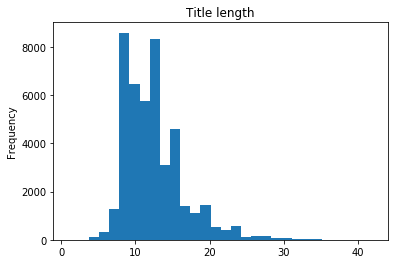

In [17]:
data['title length'].plot(kind='hist', bins=30)
plt.title('Title length')
plt.show()

In [18]:
data['title length'].describe()

count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title length, dtype: float64

The title length column appears to have a fairly narrow distribution, with a min count of 1 word and a max of 42.

**What about the text length distribution?**

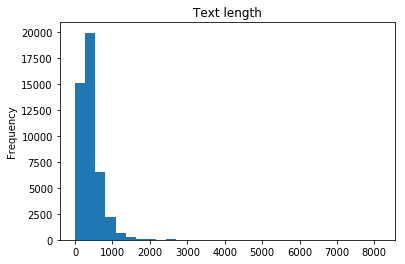

In [19]:
data['text length'].plot(kind='hist', bins=30)
plt.title('Text length')
plt.show()

In [20]:
data['text length'].describe()

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text length, dtype: float64

The text length column seems to have a some outliers, where the number of words in the article are above 2000.
Let's have a look at how many articles are longer than 2000 words, and what percentage of the total data they represent.

In [21]:
print('Number of articles with more than 2000 words: ',
      np.round(data[data['text length']>2000].count()[0]*100/len(data),2), '%')

Number of articles with more than 2000 words:  0.49 %


**To see whether the title or text length columns represent distinguishing features between Real News and Fake News, let's create separate distributions plots:**

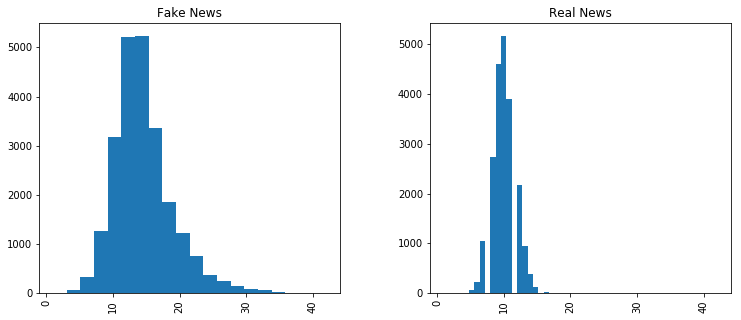

In [22]:
data.hist(column='title length', bins=20, by='label', figsize=(12,5), sharex=True)
plt.show()

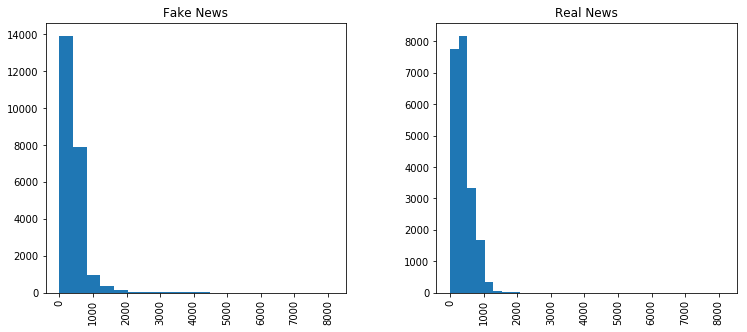

In [23]:
data.hist(column='text length', bins=20, by='label', figsize=(12,5), sharex=True)
plt.show()

#### CONCLUSION
The number of words in the title or text of the articles does not seem to be clearly different between Real News and Fake News.

In [24]:
data.drop(['title length', 'text length'], axis=1, inplace=True)

### Subject feature engineering

**Check the number of subjects across the entire dataset.**

In [25]:
data['subject'].nunique()

8

**Let's explore the distribution of each subject based on the label (Real News or Fake News).**

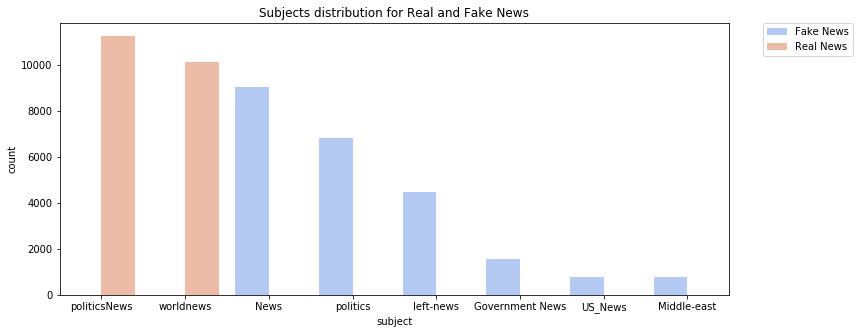

In [26]:
plt.figure(figsize=(12,5))
sns.countplot('subject', hue='label', data=data, order=data['subject'].value_counts().index, palette='coolwarm')
plt.title('Subjects distribution for Real and Fake News')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This plot indicates that the subjects are completely different between the Real and Fake News, which could create a bias in the machine learning algorithm. Indeed, if we create dummy variables based on the subjects, since there are no subjects including both Real and Fake News, the algorithm would quickly learn how to correctly classify Real and Fake News, but would most likely only learn from the subject, which do not seem to be a clear indication of the actual content of the article.

Also, we see similarities between subjects across each category of news (e.g. 'politicsNews' and 'politics').

**Let's take a look some examples to better understand the content of each subject.**

In [27]:
for sub in data['subject'].value_counts().index:
    print(sub)
    for row in range(5):
        print('\t', data[data['subject']==sub]['title'].iloc[row])

politicsNews
	 Analyst View: Democrat Jones wins Alabama U.S. Senate seat in blow to Trump
	 House of Representatives reignites gun-control debate with planned vote
	 Exclusive: Democrats Clinton, Sanders promise to include Latinos in cabinet
	 Senators question Kaleo' $4,500 tag on opioid overdose treatment
	 President's son had legitimate reasons to not answer House panel questions: White House
worldnews
	 EU leaders want clarity on citizens, Brexit financial terms and Ireland
	 Memories in milk bottles: Polish exhibition 'shouts out' annihilation story of Warsaw Ghetto
	 German minister urges EU to standardize asylum seeker benefits
	 France's Macron says world is losing battle against climate change
	 UK government averts Brexit rebellion, giving ground on EU rights plan
News
	  Fox News Shows REAL REACTION From Demoralized GOP Focus Group Full Of Trump Supporters (VIDEO)
	  NYPD Commissioner OBLITERATES Ted Cruz’s ‘Fictional’ Knowledge Of Counterterrorism
	  Mike Pence Hilariously

Before dropping the subject column completely, let's try to combine some of these subjects based on their similarities.

We should also consider what subjects only appear as Real or Fake News to try and create better balance.

**New subjects suggestions:**

| New subject name | Previous subjects names to combine |
| :--- | :--- |
| _politics_ | 'politicsNews', 'politics', 'left-news' |
| _world_news_ | 'News', 'Government News', 'US_News', 'worldnews', 'Middle-east' |

In [28]:
data['subject'] = data['subject'].apply(lambda sub: 'politics' if sub in ['politicsNews', 'politics', 'left-news'] 
                                        else 'world_news')

**We can now re-plot the distribution plot:**

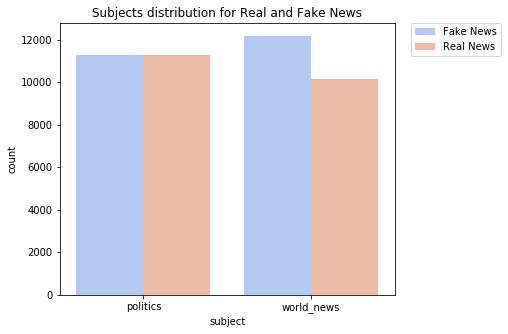

In [29]:
plt.figure(figsize=(6,5))
sns.countplot('subject', hue='label', data=data, order=data['subject'].value_counts().index, palette='coolwarm')
plt.title('Subjects distribution for Real and Fake News')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**CONCLUSION**

No clear pattern seem to be coming out of the subject column, which can therefore be dropped.

In [30]:
data.drop('subject', axis=1, inplace=True)

### Date feature engineering

**We can start by looking at the number and distribution of unique entries in the date column.**

In [31]:
data['date'].nunique()

2397

In [32]:
data['date'].value_counts()

December 20, 2017                                                                                                                                        182
December 6, 2017                                                                                                                                         166
November 30, 2017                                                                                                                                        162
November 9, 2017                                                                                                                                         158
October 13, 2017                                                                                                                                         155
September 21, 2017                                                                                                                                       153
December 21, 2017                                         

We see that there are too many unique date entries.

Also, some date values are not dates and should be removed.

**Let's replace entries that are longer than 20 characters:**

In [33]:
data['date'] = data['date'].apply(lambda date: np.nan if len(date) > 20 else date)

In [34]:
data.dropna(axis=0, inplace=True)

**Now we can create two new columns called 'month' and 'year' by converting all string dates into datetime objects and extracting the corresponding features.**

In [35]:
from dateutil import parser

data['month'] = data['date'].apply(lambda date: parser.parse(date).month)
data['year'] = data['date'].apply(lambda date: parser.parse(date).year)

**Let's look at the month and year columns distribution based on label:**

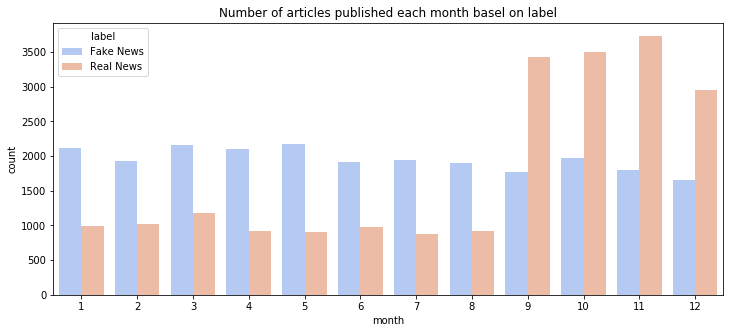

In [36]:
plt.figure(figsize=(12,5))
sns.countplot('month', data=data, hue='label', palette='coolwarm')
plt.title('Number of articles published each month basel on label')
plt.show()

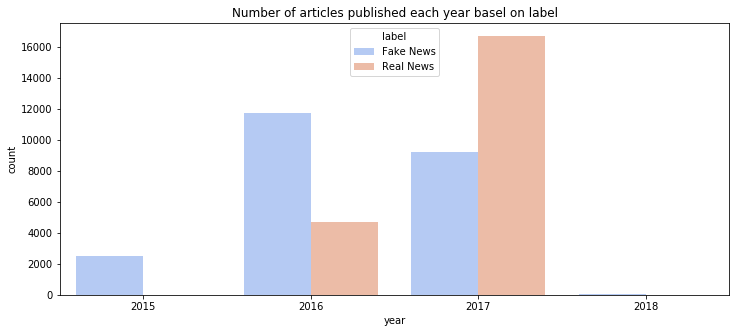

In [37]:
plt.figure(figsize=(12,5))
sns.countplot('year', data=data, hue='label', palette='coolwarm')
plt.title('Number of articles published each year basel on label')
plt.show()

**CONCLUSION**

The number of Real News articles seem to be fairly constant across months, while there is a clear increase in number of Fake News articles published from September to December.

In addition, the number of Fake News articles seem to be increasing from 2016 to 2017.

The month and year column seem interesting and could be used as potential distinguishing features.

___
## Data Pre-processing

### Dummy variables

**Since we created a 'month' and a 'year' column (in numerical format), the 'date' column is no longer needed.**

In [38]:
data.drop('date', axis=1, inplace=True)

**We can generate dummy variables using the get_dummies function from the pandas library.**

In [39]:
dum_month = pd.get_dummies(data['month'], drop_first=True)
dum_year = pd.get_dummies(data['year'], drop_first=True)

data = pd.concat([data, dum_month, dum_year], axis=1).drop(['month', 'year'], axis=1)

### Data tokenization - convertion to bag-of-words

**This operation consists of converting a text in string format to a list of words (bag-of-words) where each word is considered as a token.**

This operation can be done in many ways, but here we will simply create a function that:

1. Remove all punctuation characters from all string text
2. Remove all stop words (i.e. most common words in the English language, as they could be present in all sample and may not contribute to any form of differentiation)

In [40]:
def text_tokenization(text):
    '''
    Remove punctuation and stopwords (i.e. common words) from a text (in string format)
    and returns a list of words from the cleaned text.
    Input:
        text: text in string format
    Output:
        cleaned_text: list of words (tokens) from the corresponding text, free of punctuation and stopwords
    '''
    # Remove all punctuation from text by looking at each character
    text_no_punc = [char for char in text if char not in string.punctuation]

    # Re-join all characters to re-form a string
    text_no_punc = ''.join(text_no_punc)
    
    # Remove all stopwords
    cleaned_text = [word for word in text_no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return cleaned_text

**The function can now be applied to the 'title' and 'text' columns.**

_Warning: this operation is computationally expensive and can take a while to run! Feel free to import the pre-processed/tonekized data to avoid this time-consuming operation._

In [41]:
# If code ran for the first time, otherwise comment on the next two lines and simply import the pre-processed/tonekized data
# data['title'] = data['title'].apply(text_tokenization)
# data['text'] = data['text'].apply(text_tokenization)

data = pd.read_csv('processed_tokenized_data.csv')

In [42]:
data.head()

,title,text,label,2,3,4,5,6,7,8,9,10,11,12,2016,2017,2018
0,"['TALENTED', 'HILLARY', 'CLINTON', 'TALKS', 'D...","['forgot', 'claim', 'Hillary', 'Clinton', 'act...",Fake News,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,"['TREASON', 'White', 'House', 'Says', 'It’s', ...","['anyone', 'please', 'explain', 'US', 'got', '...",Fake News,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,"['32', 'Million', 'Uninsured', 'Premiums', 'Do...","['new', 'report', 'released', 'Congressional',...",Fake News,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,"['Democrat', 'Mayor', 'Proclaims', 'He’s', 'Ba...","['breathe', 'sigh', 'relief', 'knowing', 'reas...",Fake News,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,"['Samantha', 'Bee', 'Tells', 'Ted', 'Cruz', 'S...","['Coming', 'Tuesday', 'Republican', 'primary',...",Fake News,0,0,0,1,0,0,0,0,0,0,0,1,0,0


**Since the text tokenization take a long time to process, we can save the pre-processed and tokenized data into a csv file:**

In [162]:
data.to_csv('processed_tokenized_data.csv', index=False)

### Vectorization

At this stage, all text data (from 'title' and 'text' columns) are represented by lists of tokens (also named _lemmas_), which require to be converted to some form of numerical vector in order to be processed by a machine learning algorithm.

This operation is called **Vectorization** and can be done using the _CountVectorizer_ tool from SciKit Learn, which will convert our lists of tokens into a (mxn) matrix of tokens counts as illustrated below:

| Entire vocabulary | Text 1 | Text 2 | ... | Text N |
|:---|:---:|:---:|:---:|:---:|
|Word 1 count | 1 | 0 | ... | 1 |
|Word 2 count | 0 | 1 | ... | 0 |
| ... | ... | ... | ... | ... |
| Word i count | 0 | 2 | ... | 0 |
| ... | ... | ... | ... | ... |
|Word M count | 1 | 0 | ... | 3 |

**Note:** Since this transformation usually results in a lot of zeros (as many text samples won't have a lot of words from the entire vocabulary), the _CountVectorizer_ tool from SciKit Learn will output a _Sparse Matrix_.

### Term frequency-inverse document frequency (TD-IDF) weights calculation

TD-IDF weight is a statistical measure used to evaluate how important a term/word is to a text/document in a collection or corpus (i.e. dataset). It is calculated as followed:

**1. Term frequency (TD):**

    TD(T) = ( Total counts of term T in a given document ) / ( Total number of terms in the same document )


**2. Inverse document frequency (IDF), which measures how import a term/word is based on how often it appears in the whole datatset (all texts/documents):**

    IDF(T) = log_e ( Total number of documents / Number of documents that have term T in them)

**TD-IDF = TD x IDF**

___
## Machine Learning

### Pipeline definition
**Create a pipeline that will:**
1. Vectorize the data
2. Calculate the TD-IDF weight of each word
3. Define the type of classifier for the machine learning algorithm

In terms of classifier, [Naive Bayes models](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf) models have been shown to perform quite well on text data. Therefore, we will use the _MultinomialNB_ model from SciKit Learn.

In [43]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Input data and labels definition

**We will start by only including the 'title' column as input.**

In [44]:
X = data['title']
y = data['label']

**Split the data into training and test sets:**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### Run pipeline and fit model to training data

In [46]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Model evaluation

**Generate predictions:**

In [47]:
predictions = pipeline.predict(X_test)

**Evaluate the model using classification report and confusion matrix:**

In [48]:
cm = confusion_matrix(y_test, predictions)
print('CONFUSION MATRIX\n')
print('Total number of')
print('\tTrue positives:\t\t', cm[1,1])
print('\tTrue negatives:\t\t', cm[0,0])
print('\tFalse positives:\t', cm[0,1], '\t\tType I error')
print('\tFalse negatives:\t', cm[1,0], '\t\tType II error')
print('\n')
print('Correct classifications:\t', np.round(100*(cm[0,0]+cm[1,1])/len(X_test),2), '%')
print('Incorrect classifications:\t', np.round(100*(cm[1,0]+cm[0,1])/len(X_test),2), '%')
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, predictions))

CONFUSION MATRIX

Total number of
	True positives:		 5929
	True negatives:		 6745
	False positives:	 316 		Type I error
	False negatives:	 477 		Type II error


Correct classifications:	 94.11 %
Incorrect classifications:	 5.89 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

   Fake News       0.93      0.96      0.94      7061
   Real News       0.95      0.93      0.94      6406

    accuracy                           0.94     13467
   macro avg       0.94      0.94      0.94     13467
weighted avg       0.94      0.94      0.94     13467



The model performed great in precision and recall for both labels.

Looking at the confusion matrix, we can see that there are still quite a few False Negatives (Type II error) and False Positives (Type I error).

**Let's see if the 'text' column, will help improve the model.**

In [49]:
X = data['text']
y = data['label']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [52]:
predictions = pipeline.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, predictions)
print('CONFUSION MATRIX\n')
print('Total number of')
print('\tTrue positives:\t\t', cm[1,1])
print('\tTrue negatives:\t\t', cm[0,0])
print('\tFalse positives:\t', cm[0,1], '\t\tType I error')
print('\tFalse negatives:\t', cm[1,0], '\t\tType II error')
print('\n')
print('Correct classifications:\t', np.round(100*(cm[0,0]+cm[1,1])/len(X_test),2), '%')
print('Incorrect classifications:\t', np.round(100*(cm[1,0]+cm[0,1])/len(X_test),2), '%')
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, predictions))

CONFUSION MATRIX

Total number of
	True positives:		 6191
	True negatives:		 6597
	False positives:	 464 		Type I error
	False negatives:	 215 		Type II error


Correct classifications:	 94.96 %
Incorrect classifications:	 5.04 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

   Fake News       0.97      0.93      0.95      7061
   Real News       0.93      0.97      0.95      6406

    accuracy                           0.95     13467
   macro avg       0.95      0.95      0.95     13467
weighted avg       0.95      0.95      0.95     13467



The overall performance of the model was slightly improved when only using the 'text' column.

**As a final test, let's try to combine the 'title' and 'text' columns as a new column called 'article'.**

In [54]:
data['article'] = data['title'] + data['text']

**We can now repeat the steps above and re-train the model using the data from this new column.**

In [55]:
X = data['article']
y = data['label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 

In [57]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [58]:
predictions = pipeline.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, predictions)
print('CONFUSION MATRIX\n')
print('Total number of')
print('\tTrue positives:\t\t', cm[1,1])
print('\tTrue negatives:\t\t', cm[0,0])
print('\tFalse positives:\t', cm[0,1], '\t\tType I error')
print('\tFalse negatives:\t', cm[1,0], '\t\tType II error')
print('\n')
print('Correct classifications:\t', np.round(100*(cm[0,0]+cm[1,1])/len(X_test),2), '%')
print('Incorrect classifications:\t', np.round(100*(cm[1,0]+cm[0,1])/len(X_test),2), '%')
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, predictions))

CONFUSION MATRIX

Total number of
	True positives:		 6079
	True negatives:		 6665
	False positives:	 396 		Type I error
	False negatives:	 327 		Type II error


Correct classifications:	 94.63 %
Incorrect classifications:	 5.37 %

CLASSIFICATION REPORT

              precision    recall  f1-score   support

   Fake News       0.95      0.94      0.95      7061
   Real News       0.94      0.95      0.94      6406

    accuracy                           0.95     13467
   macro avg       0.95      0.95      0.95     13467
weighted avg       0.95      0.95      0.95     13467



As expected, the performance of the model using the entire article (i.e. title + text) performed as the average of the 'title' and 'text' models.

## Conclusion

Using data manipulation and visualization, feature engineering and natural language processing, we were able to train a Naive Bayes Machine Learning model that can distinguish between Real News and Fake News with an accuracy of 95% on test data. Considering that the original dataset was well balanced (i.e. comparable number of Fake News and Real News samples), this final result can be considered great.

**This pipeline could easily be transferred to other binary text classification problems (e.g. ham or spam emails).**